In [1]:
import json


data = None
path1 = '../results/results_projection_onto_symmetric_subspace_4.json'
path2 = '../results/results_average_commutator_norm_4.json'
with open(path2, 'r') as file:
    data = json.load(file)

font_path = "C:\\Users\\valte\\OneDrive - University of Helsinki\\Desktop\\linux_libertine\\LinLibertine_R.ttf"

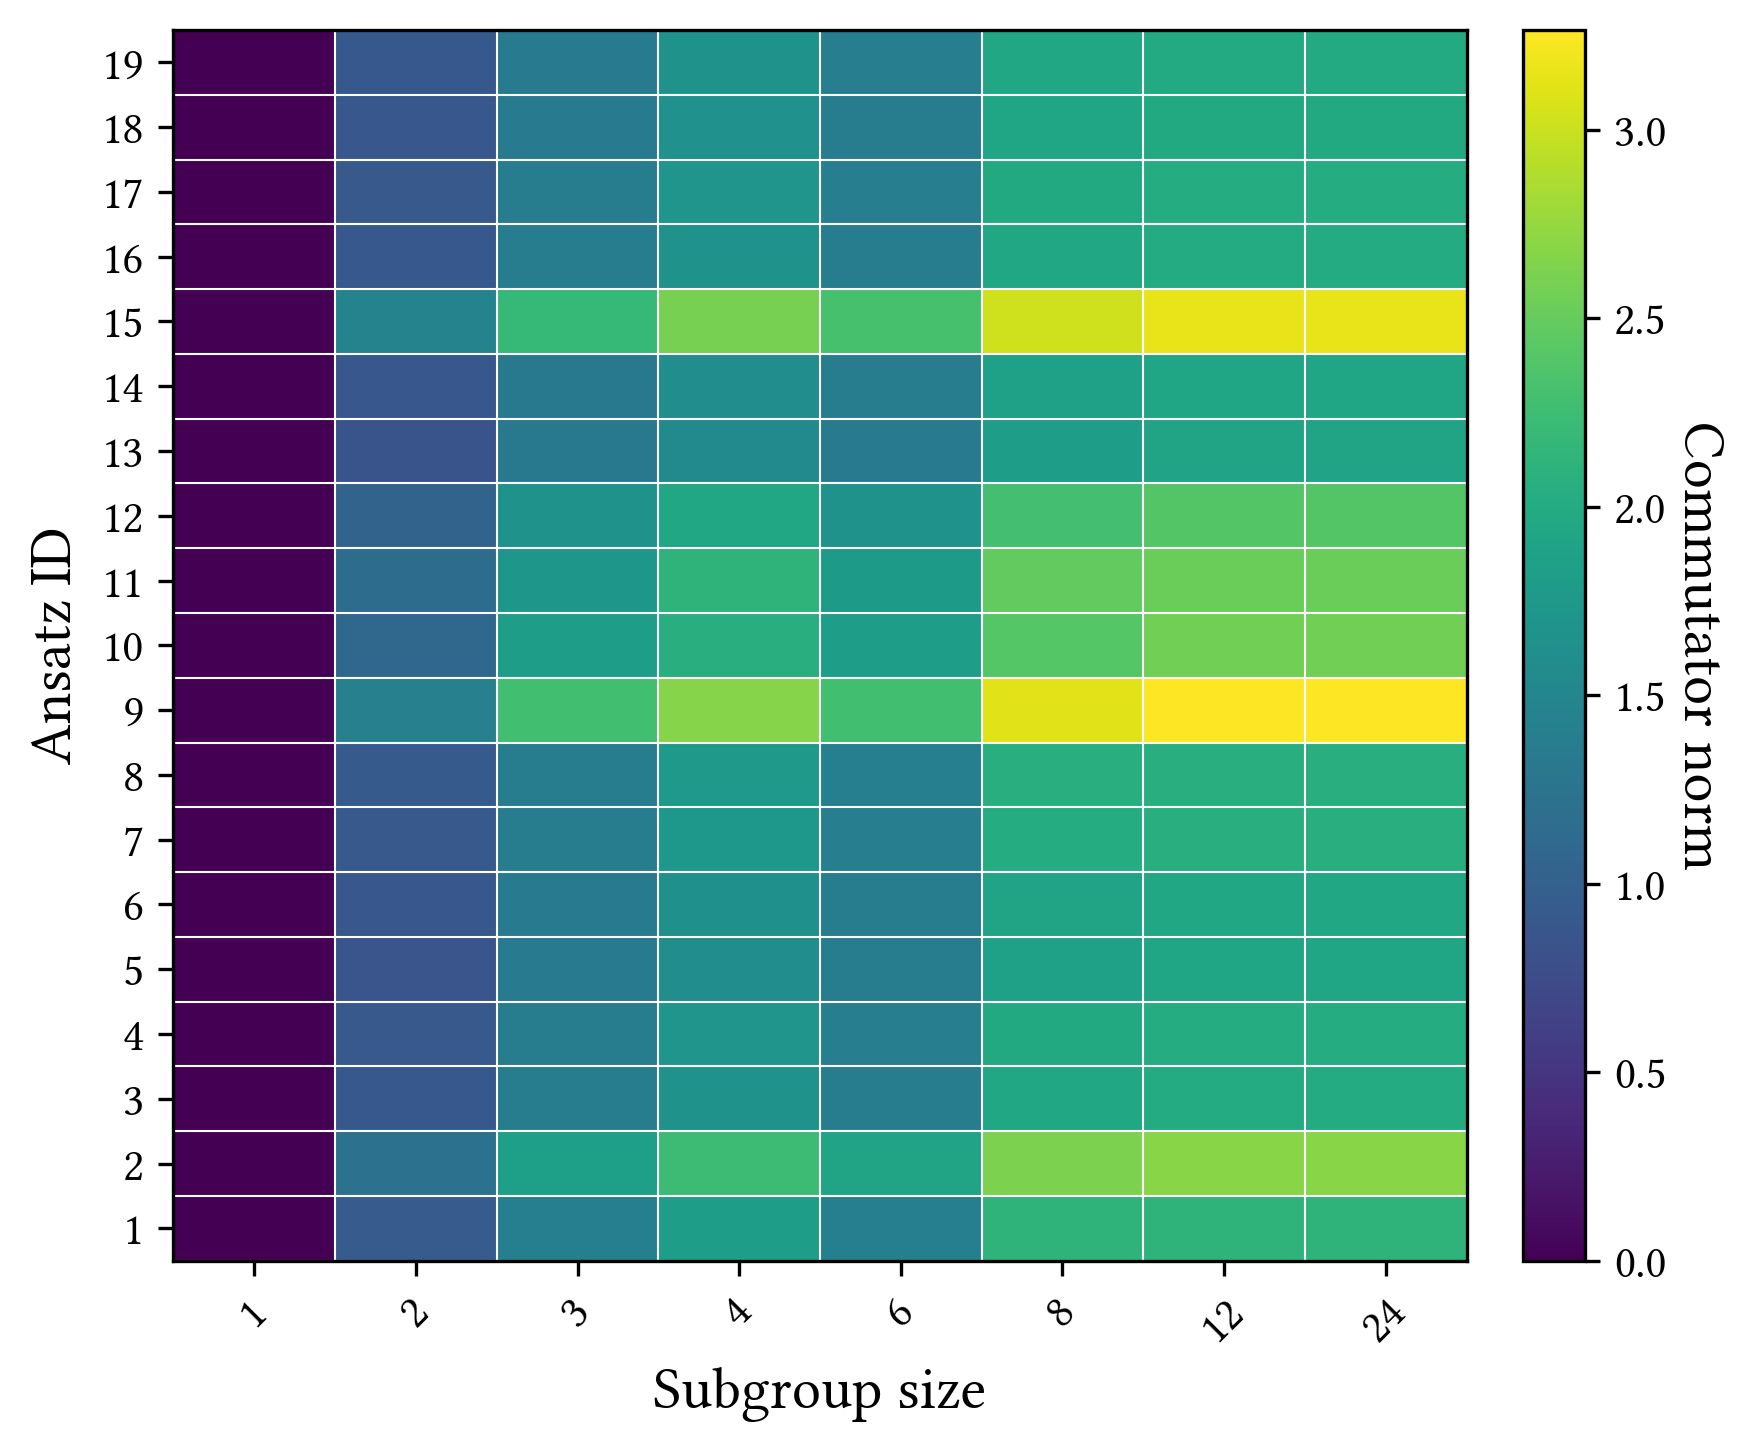

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager

# ====== Font configuration (Linux Libertine) ======
# Make sure the font file LinLibertine_R.ttf is in your working directory or specify its full path
font_manager.fontManager.addfont(font_path)
plt.rcParams.update({
    "font.family": "Linux Libertine",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "figure.dpi": 300,
    "axes.linewidth": 0.8,
    "axes.edgecolor": "black"
})

# ====== Parameters described by the user ======
layers = list(range(1,6))        # 1..5
ansatzes = list(range(1,20))     # 1..19
subgroups = [1,2,3,4,6,8,12,24]  # subgroup sizes used in the snippet

data_records = []
for layer in layers:
    for ans in ansatzes:
        for s in subgroups:
            value = data["4"][str(layer)][str(ans)][str(s)]
            data_records.append({"layer": layer, "ansatz": ans, "subgroup": s, "value": float(value)})

df = pd.DataFrame.from_records(data_records)

# ====== Choose which layer to plot ======
layer_to_plot = 1
subset = df[df["layer"] == layer_to_plot]

# Pivot for heatmap
pivot = subset.pivot(index="ansatz", columns="subgroup", values="value")

# ====== Plot ======
fig, ax = plt.subplots(figsize=(6,5))
im = ax.imshow(pivot, aspect="auto", origin="lower", cmap="viridis")

# Labels and title
#ax.set_title(f"Layer {layer_to_plot}", pad=12)
ax.set_xlabel("Subgroup size")
ax.set_ylabel("Ansatz ID")

# Ticks
ax.set_xticks(range(len(pivot.columns)))
ax.set_xticklabels(pivot.columns, rotation=45)
ax.set_yticks(range(len(pivot.index)))
ax.set_yticklabels(pivot.index)

# Add subtle gridlines for readability
ax.set_xticks(np.arange(-0.5, len(pivot.columns), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(pivot.index), 1), minor=True)
ax.grid(which="minor", color="white", linestyle="-", linewidth=0.5)
ax.tick_params(which="minor", bottom=False, left=False)

# Colorbar
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.ax.set_ylabel("Commutator norm", rotation=270, labelpad=14)

plt.tight_layout()
plt.show()


In [3]:
# Min-max normalize values for each layer
normalized_records = []
for layer in layers:
    layer_data = df[df["layer"] == layer]
    min_val = layer_data["value"].min()
    max_val = layer_data["value"].max()
    for _, row in layer_data.iterrows():
        norm_value = (row["value"] - min_val) / (max_val - min_val) if max_val > min_val else 0.0
        normalized_records.append({"layer": row["layer"], "ansatz": row["ansatz"], "subgroup": row["subgroup"], "value": norm_value})
df_normalized = pd.DataFrame.from_records(normalized_records)

# For each ansatz, check how different the values are across layers
ansatz_variability = []
for ans in ansatzes:
    ans_data = df_normalized[df_normalized["ansatz"] == ans]
    print(f"Ansatz {ans} normalized values across layers: {ans_data['value'].values}")
    variability = ans_data["value"].max() - ans_data["value"].min()
    ansatz_variability.append({"ansatz": ans, "variability": variability})

df_variability = pd.DataFrame.from_records(ansatz_variability)
df_variability = df_variability.sort_values(by="variability", ascending=False)
print(df_variability)

Ansatz 1 normalized values across layers: [0.         0.28884008 0.43326012 0.55704872 0.43326012 0.64989018
 0.64989018 0.64989018 0.         0.28884008 0.43326012 0.55704872
 0.43326012 0.64989018 0.64989018 0.64989018 0.         0.28884008
 0.43326012 0.55704872 0.43326012 0.64989018 0.64989018 0.64989018
 0.         0.28884008 0.43326012 0.55704872 0.43326012 0.64989018
 0.64989018 0.64989018 0.         0.28884008 0.43326012 0.55704872
 0.43326012 0.64989018 0.64989018 0.64989018]
Ansatz 2 normalized values across layers: [0.         0.37529592 0.56294388 0.68677075 0.58453552 0.80123254
 0.82282418 0.82282418 0.         0.37529592 0.56294388 0.68677075
 0.58453552 0.80123254 0.82282418 0.82282418 0.         0.37529592
 0.56294388 0.68677075 0.58453552 0.80123254 0.82282418 0.82282418
 0.         0.37529592 0.56294388 0.68677075 0.58453552 0.80123254
 0.82282418 0.82282418 0.         0.37529592 0.56294388 0.68677075
 0.58453552 0.80123254 0.82282418 0.82282418]
Ansatz 3 normalized 